# **Part 1: Data VisualizationData Visualization I (Exploring the Titanic Dataset):**
-------------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

+ ### **Load the Titanic dataset.**

In [3]:
df = pd.read_csv('train.csv')
# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


+ ### **Explore the data using Pandas and NumPy.**

In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Fill missing values or drop columns/rows with missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)
df.drop

<bound method DataFrame.drop of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                               

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
df = df.drop('Cabin', axis=1)
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [12]:
# Create new features
df['FamilySize'] = df['SibSp'] + df['Parch']

# Convert categorical variables to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'])

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

sex_en = LabelEncoder()
df['Sex']= sex_en.fit_transform(df['Sex'])


In [14]:
name_en = LabelEncoder()
df['Name']= name_en.fit_transform(df['Name'])

ticket_en = LabelEncoder()
df['Ticket']= ticket_en.fit_transform(df['Ticket'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    int32  
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    int32  
 9   Fare         889 non-null    float64
 10  FamilySize   889 non-null    int64  
 11  Embarked_C   889 non-null    bool   
 12  Embarked_Q   889 non-null    bool   
 13  Embarked_S   889 non-null    bool   
dtypes: bool(3), float64(2), int32(2), int64(7)
memory usage: 79.0 KB


In [16]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)


             PassengerId  Survived    Pclass      Name       Sex       Age  \
PassengerId     1.000000 -0.005028 -0.035330 -0.041324 -0.043136  0.030300   
Survived       -0.005028  1.000000 -0.335549 -0.059075  0.541585 -0.074673   
Pclass         -0.035330 -0.335549  1.000000  0.054837 -0.127741 -0.327954   
Name           -0.041324 -0.059075  0.054837  1.000000 -0.022087  0.054221   
Sex            -0.043136  0.541585 -0.127741 -0.022087  1.000000 -0.089434   
Age             0.030300 -0.074673 -0.327954  0.054221 -0.089434  1.000000   
SibSp          -0.057686 -0.034040  0.081656 -0.016558  0.116348 -0.231875   
Parch          -0.001657  0.083151  0.016824 -0.048533  0.247508 -0.178232   
Ticket         -0.056852 -0.160931  0.315959  0.049406 -0.055024 -0.063799   
Fare            0.012703  0.255290 -0.548193 -0.050396  0.179958  0.088604   
FamilySize     -0.040258  0.018277  0.064221 -0.035567  0.203191 -0.247546   
Embarked_C     -0.001208  0.169966 -0.245733  0.001276  0.084520

+ ### **Create visualizations (e.g., bar plots, scatter plots, histograms) to analyze passenger demographics, survival rates, and ticket fares.**

+ Bar Plot: Survival Rate by Passenger Class

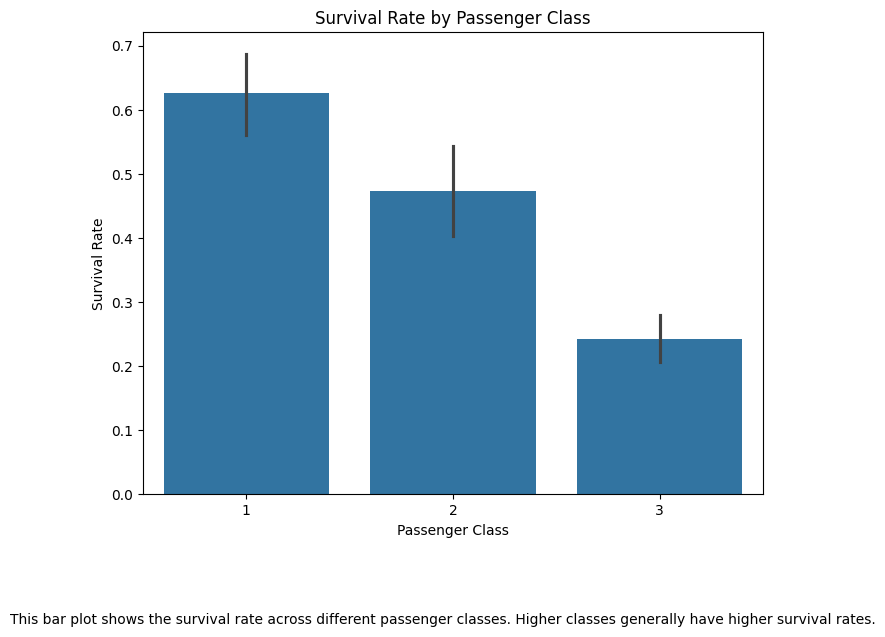

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.figtext(0.5, -0.1, 'This bar plot shows the survival rate across different passenger classes. Higher classes generally have higher survival rates.', ha='center', va='center', fontsize=10)
plt.show()


+ Scatter Plot: Age vs. Fare

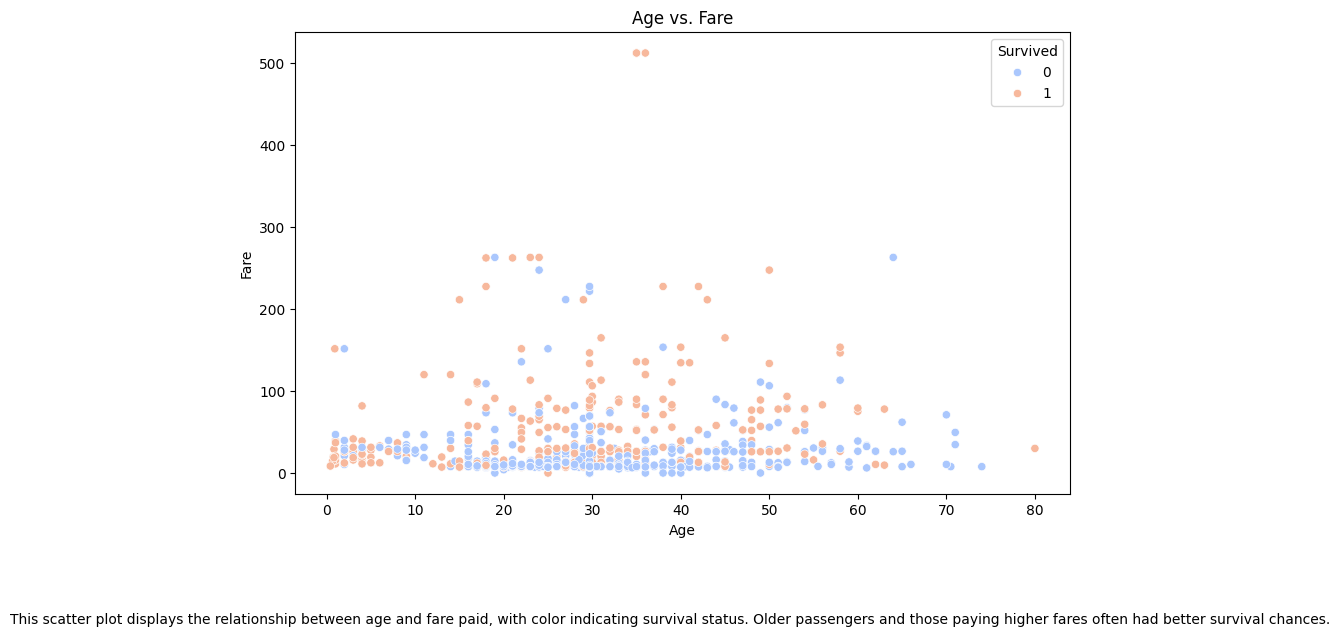

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm')
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.figtext(0.5, -0.1, 'This scatter plot displays the relationship between age and fare paid, with color indicating survival status. Older passengers and those paying higher fares often had better survival chances.', ha='center', va='center', fontsize=10)
plt.show()


+ Histogram: Distribution of Ages

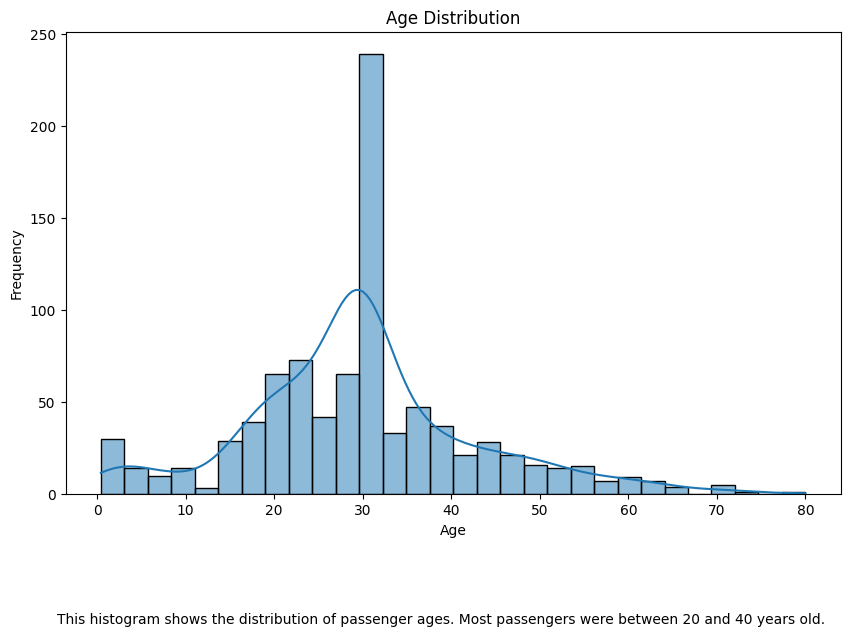

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.figtext(0.5, -0.1, 'This histogram shows the distribution of passenger ages. Most passengers were between 20 and 40 years old.', ha='center', va='center', fontsize=10)
plt.show()


+ Histogram: Distribution of Fares

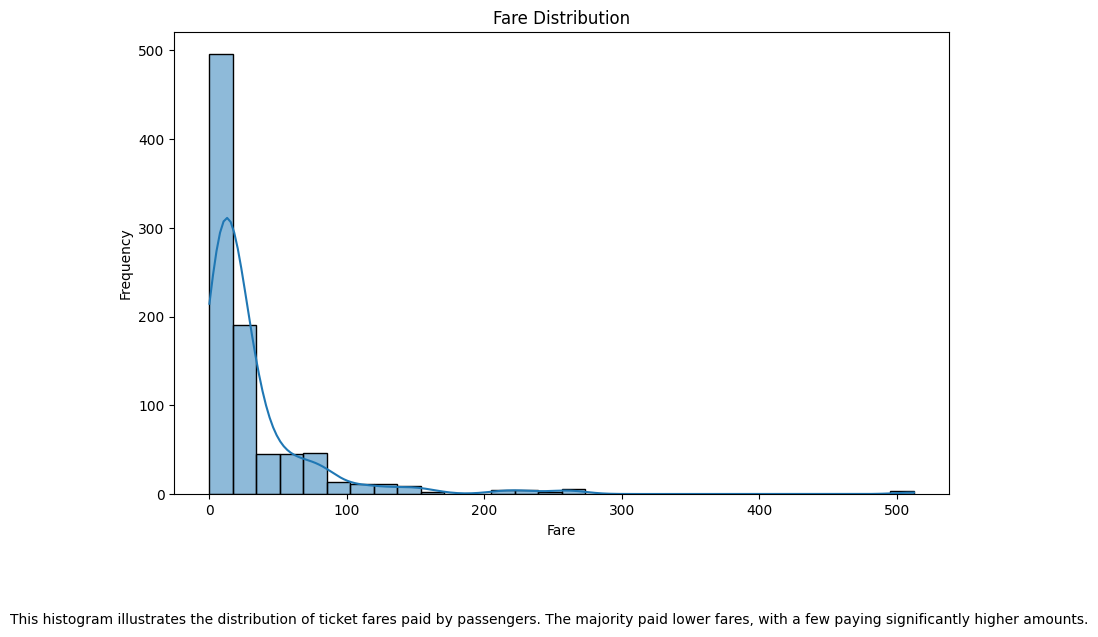

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'].dropna(), bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.figtext(0.5, -0.1, 'This histogram illustrates the distribution of ticket fares paid by passengers. The majority paid lower fares, with a few paying significantly higher amounts.', ha='center', va='center', fontsize=10)
plt.show()
